# Figure showing the method of fitting

In [11]:
import glob
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rcParams['font.family'] = 'arial'

In [14]:
path = Path('../data/interim/peak_shapes/example/buddingtonite.csv')

In [15]:
df = pd.read_csv(path, index_col=0)
df

,L,cps_per_nA,cps_per_nA_stdev,baseline,cps_per_nA_corrected,fit
0,125.0,3.711111,1.621004,4.343680,-0.632569,0.000074
1,125.1,4.500000,1.774824,4.300031,0.199969,0.000080
2,125.2,4.133333,1.892676,4.257084,-0.123751,0.000087
3,125.3,3.977778,1.414039,4.214827,-0.237049,0.000095
4,125.4,4.011111,1.589277,4.173243,-0.162131,0.000103
...,...,...,...,...,...,...
396,164.6,0.600000,0.566993,0.709059,-0.109059,0.001461
397,164.7,0.511111,0.492412,0.707664,-0.196553,0.001364
398,164.8,0.677778,0.589936,0.706276,-0.028498,0.001272
399,164.9,0.622222,0.687094,0.704896,-0.082674,0.001186


In [16]:
L_units = np.loadtxt('../data/interim/peak_shapes/example/mc_example/L_units.csv')
print(len(L_units))
df_mc = pd.DataFrame(np.loadtxt('../data/interim/peak_shapes/example/mc_example/mc_array.csv'))
df_mc.index = L_units
df_mc

251


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
135.0,0.014283,-0.003998,0.130296,-0.025002,0.232288,-0.102828,0.133697,0.127888,0.214676,0.030002,...,-0.026377,0.262377,-0.025508,0.170283,0.227900,0.170382,0.076139,0.151419,0.051638,0.092120
135.1,0.213418,-0.169090,-0.248145,-0.120212,0.011928,0.018077,-0.103180,0.035622,-0.039113,0.017940,...,-0.128432,0.137261,-0.130466,0.126563,0.008651,0.083090,0.064461,0.213186,0.147212,-0.016509
135.2,0.149110,0.019943,0.064370,0.233013,0.152368,0.284829,0.041667,0.082684,-0.014636,-0.089631,...,0.161381,0.245719,0.152439,0.081269,0.055969,0.324931,-0.035379,-0.087477,0.019353,0.104710
135.3,0.201173,0.227456,-0.136072,0.222291,-0.031565,0.223781,0.055556,0.076139,-0.223457,-0.050971,...,0.067973,0.099006,0.195950,-0.007239,0.065882,-0.177719,0.198094,-0.053554,0.047016,0.075319
135.4,0.132176,0.101647,-0.058933,-0.009337,0.270373,-0.060073,0.017784,-0.026492,0.237394,0.269309,...,-0.087988,0.137330,0.143186,0.246933,0.034541,0.090227,-0.041993,0.115913,0.135959,0.412663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159.6,0.063699,0.127051,0.115879,0.132224,0.073501,0.173233,-0.012267,-0.225227,0.127121,-0.085646,...,-0.067019,-0.054702,0.018675,0.222235,-0.175408,-0.003220,0.041226,-0.012925,0.007900,-0.105267
159.7,-0.105613,0.108026,0.296508,0.114593,0.093350,-0.045868,0.090174,0.043171,-0.020296,-0.157625,...,-0.079250,0.130197,0.179389,-0.125159,-0.069937,0.111048,0.190069,-0.089358,-0.092648,-0.021791
159.8,0.090479,0.045731,-0.095957,0.023905,0.028412,-0.137606,0.002913,-0.025908,0.058269,0.073590,...,0.052891,-0.099856,-0.116976,-0.053916,-0.052356,0.167044,0.045642,-0.080904,0.076668,-0.250509
159.9,0.072026,-0.133475,-0.039434,-0.003238,-0.031969,0.138303,0.044556,0.033380,0.015979,-0.072734,...,-0.025608,0.015178,-0.066513,-0.183553,0.268012,0.027328,0.168219,0.079330,-0.140207,0.178278


In [17]:
def plot_panel_1(df, ax):
    
    ax.plot(df.L, df.cps_per_nA, '-k', lw=1)
    ax.plot(df.L, df.baseline, '-r', lw=2)
    
    ax.set_title('Original data', fontsize=10)
    
    return None

In [18]:
def plot_panel_2(df, ax):
    
    ax.plot(df.L, df.cps_per_nA_corrected, '-k', lw=1)
    ax.plot(df.L, df.fit, '-r', lw=2)
    
    ax.set_title('Background-corrected data', fontsize=10)
    

In [19]:
def plot_panel_3(df_mc, ax):
    
    for col in df_mc.columns:
        ax.plot(df_mc.index, df_mc[col], lw=0.1)
        
    ax.set_title('Montecarlo simulations', fontsize=10)

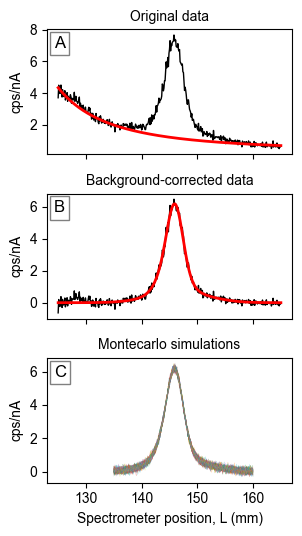

In [22]:
fig, axs = plt.subplots(3, 1, figsize = (8*0.39, 14*0.39), sharex=True)

plot_panel_1(df, axs[0])
plot_panel_2(df, axs[1])
plot_panel_3(df_mc, axs[2])

for ax in axs:
    ax.set_ylabel('cps/nA')
    
axs[2].set_xlabel('Spectrometer position, L (mm)')

alphalabel = 'ABC'
for i, ax in enumerate(axs):
    trans = mtransforms.ScaledTranslation(5/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, alphalabel[i], transform=ax.transAxes + trans,
            fontsize=12, verticalalignment='top', fontfamily='Arial',
            bbox=dict(facecolor='w', edgecolor='grey', pad=3.0))

plt.tight_layout()

plt.savefig('../figures/figure_fit_method.png')